# Car Accidents Italy

Notebook for data analysis for car accidents in Italy.

In [1]:
dati_general_retrospective <- read.csv("dataset/2018_tav4_01.csv", header=T, sep=';', skip = 7)

In [2]:
dati_general_retrospective  <-  dati_general_retrospective[c(1,2,3,4,6,7,8)]
dati_general_retrospective

X,Incidenti,Morti,Feriti,Incidenti.1,Morti.1,Feriti.1
1986,155427,7076,213159,6330,7076,5355
1987,158208,6784,217511,6065,6784,5059
1988,166033,6939,228186,6273,6939,5289
1989,160828,6410,216329,5766,6410,4669
1990,161782,6621,221024,5880,6621,4866
1991,170702,7498,240688,6633,7498,5944
1992,170814,7434,241094,6578,7434,5771
1993,153393,6645,216100,5893,6645,5171
1994,170679,6578,239184,5924,6578,4857
1995,182761,6512,259571,5819,6512,5200


In [3]:
attach(dati_general_retrospective)

In [4]:
names(dati_general_retrospective)[names(dati_general_retrospective)=="X"]  <- "Anni" 

In [27]:
pdf("Accidents.pdf")
plot(X,Incidenti, type='l', main="Total Accidents per year in Italy", xlab = "Years", ylab="")
par(new=TRUE)
plot(X,Morti, col="red", type='l',xlab="", ylab='',axes=F, lty=2)
axis(4,col=2,col.axis=2, labels=T)
legend("topright",legend=c("Incidents", "Deaths"),
       col=c("black", "red"), lty=1:2, cex=0.8)
dev.off()

pdf 
  2

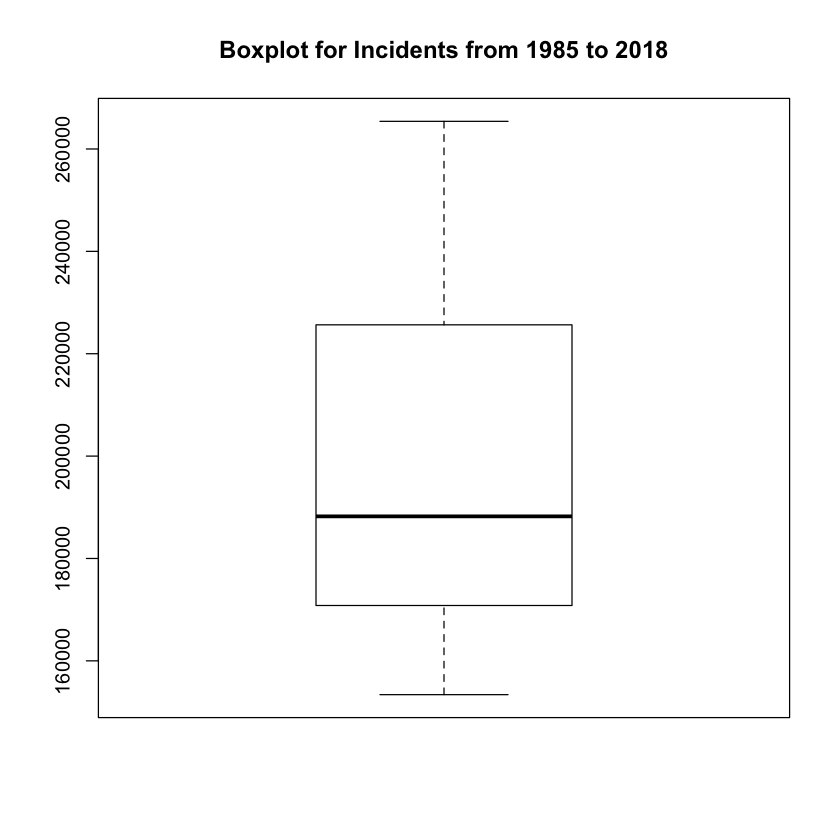

In [6]:
boxplot(Incidenti, main="Boxplot for Incidents from 1985 to 2018")

In [7]:
quantile(Incidenti)

0%    25%    50%    75%   100% 
153393 170814 188228 225646 265402

In [8]:
max_incidenti= max(Incidenti)

In [9]:
anno_max = dati_general_retrospective[which(Incidenti==max_incidenti),1]

In [10]:
cat("L'anno con il maggior numero di incidenti è stato il",anno_max)

L'anno con il maggior numero di incidenti è stato il 2002

In [11]:
cat("L'anno con il minor numero di incidenti è stato il", 
    dati_general_retrospective[which(Incidenti==min(Incidenti)),1])

L'anno con il minor numero di incidenti è stato il 1993